<center>
# Introduction to the brightwind library
</center>
***


In [1]:
import datetime
print('Last updated: {}'.format(datetime.date.today().strftime('%d %B, %Y')))

Last updated: 05 July, 2019


***

<div style='margin-top: 3em; margin-bottom: 3em;'>
</div>

## Outline:

This tutorial provides a quick summary of some of the main functionality of the brightwind library. The following topics are included, most of which are covered in more detail within subsequent tutorials:

1. Using the brightwind library in a Jupyter Notebook
1. Importing data
1. Applying cleaning to data
1. Checking basic statistics and time continuity 
1. Plotting monthly means
1. Plotting sector ratios
1. Plotting a '12x24' distribution
1. Scaling a wind speed
1. Plotting a wind rose and exporting a .tab file


***

<div style='margin-top: 3em; margin-bottom: 3em;'>
</div>

## Using the brightwind library in a Jupyter Notebook

In [2]:
import brightwind as bw

With the brightwind library installed and imported in a Jupyter notebook, you can begin to analyse data using a wide range of functions available in the librabry. A list of these functions is displayed when you type '.bw' and press 'Tab'.

<div style='margin-top: 2em; margin-bottom: 2em;'>
</div>

<center>

![image1](images\Introduction_1.png)

</center>


In [ ]:
bw.

Once you have selected a function from the list, click on the function name and insert and open parenthesis, e.g.:
```
bw.monthly_means() 
```
To view the list of necessary inputs for this function, press ‘Shift’ and ‘Tab’ simultaneously. A drop-down box containing the signature and docstring of the function will be displayed. The docstring explains the required inputs and their formats for each function. The docstring displayed also gives an example usage of the function and some other helpful information about its use. To view the docstring, click on the ‘+’ sign: 

<div style='margin-top: 2em; margin-bottom: 2em;'>
</div>
<center>

![image1](images\Introduction_2.png)

</center>

<br>

The signature section of the docstring explains the arguments of the function. Some arguments are required for the function to run, e.g. data in <em>monthly_means</em>, while other named arguments have default values defined and need not be specified, e.g. <em>return_data</em>  in <em>monthly_means</em> which has a default value of <em>False</em>.

<div style='margin-top: 2em; margin-bottom: 2em;'>
</div>
<center>
    
![image2](images\Introduction_3.png)

</center>

***

<div style='margin-top: 3em; margin-bottom: 3em;'>
</div>

## Importing Data
* Most wind data analysis will start with importing data from excel spreadsheets, .csv files or similar. 

* To follow along with this and the other tutorials you can download some demo datasets from Dropbox [here](https://www.dropbox.com/sh/5davq0335t6ytgk/AADKFgFrp0f3yDhhFcYzB8eia?dl=0), and save them locally on your computer.

* To import data into the workspace from a .csv file, we can use then use `load_csv()` function.
<br>

* If the local directory of this file is 'C:\Users\Stephen\Documents\Analysis\demo_data.csv', we can use the following command to load it into a data frame called 'data'.

* After typing it out, the command can be run by pressing ‘Shift’ and ‘Enter’.

* This will load the data from the .csv into a pandas DataFrame, which is essentially a spreadsheet in the Python environment. 

In [3]:
data = bw.load_csv(r'C:\Users\Stephen\Documents\Analysis\demo_data.csv') 

To view the DataFrame, type 'data' and press ‘Shift’ + ‘Enter’ to run the cell. 

To keep things concise, below we will use the `.head()` function to only call the first 5 entries in the dataset.  

In [4]:
data.head(5)

,Spd80mN,Spd80mS,Spd60mN,Spd60mS,Spd40mN,Spd40mS,Spd80mNStd,Spd80mSStd,Spd60mNStd,Spd60mSStd,...,Dir78mSStd,Dir58mS,Dir58mSStd,Dir38mS,Dir38mSStd,T2m,RH2m,P2m,PrcpTot,BattMin
Timestamp,,,,,,,,,,,,,,,,,,,,,
2016-01-09 15:30:00,8.370,7.911,8.160,7.849,7.857,7.626,1.240,1.075,1.060,0.947,...,6.100,110.1,6.009,112.2,5.724,0.711,100.0,935.0,0.0,12.94
2016-01-09 15:40:00,8.250,7.961,8.100,7.884,7.952,7.840,0.897,0.875,0.900,0.855,...,5.114,110.9,4.702,109.8,5.628,0.630,100.0,935.0,0.0,12.95
2016-01-09 17:00:00,7.652,7.545,7.671,7.551,7.531,7.457,0.756,0.703,0.797,0.749,...,4.172,113.1,3.447,111.8,4.016,1.126,100.0,934.0,0.0,12.75
2016-01-09 17:10:00,7.382,7.325,6.818,6.689,6.252,6.174,0.844,0.810,0.897,0.875,...,4.680,118.8,5.107,115.6,5.189,0.954,100.0,934.0,0.0,12.71
2016-01-09 17:20:00,7.977,7.791,8.110,7.915,8.140,7.974,0.556,0.528,0.562,0.524,...,3.123,115.9,2.960,113.6,3.540,0.863,100.0,934.0,0.0,12.69



Now that data is available in the workspace, it can be analysed using various brightwind functions. Most of these functions require data in the form of a DataFrame or a Series (a one-dimensional DataFrame).

***

<div style='margin-top: 3em; margin-bottom: 3em;'>
</div>

## Applying cleaning to data

The `apply_cleaning()` function can be used to quickly apply an exisiting cleaning file to the data using the following commands.

In [5]:
# specify location of associated cleaning file
cleaning_file_path = r'C:\Users\Stephen\Documents\Analysis\demo_cleaning_file.csv'

# apply cleaning
clean_data = bw.apply_cleaning(data, cleaning_file_path)

Cleaning applied. (Please remember to assign the cleaned returned DataFrame to a variable.)


***

<div style='margin-top: 3em; margin-bottom: 3em;'>
</div>

## Checking basic statistics and time continuity 

The code below can be used to specify the names of each wind speed variable within the dataset. 

In [6]:
# create list of columns which include each wind speed variable
anemometers = ['Spd80mN', 'Spd80mS', 'Spd60mN', 'Spd60mS', 'Spd40mN', 'Spd40mS']

This list can then be used to apply functions like `basic_stats()` to these variables only. 

In [7]:
# show basic statistics of the anemometer variables within the clean dataset
bw.basic_stats(clean_data[anemometers])

,count,mean,std,min,max
Spd80mN,95180.0,7.518636,3.994552,0.215,29.00
Spd80mS,83629.0,7.390041,3.997481,0.094,29.27
Spd60mN,95180.0,7.052587,3.806488,0.214,28.22
Spd60mS,95180.0,7.135864,3.898363,0.080,29.03
Spd40mN,95180.0,6.761385,3.735660,0.228,27.38
Spd40mS,95180.0,6.820594,3.810865,0.092,28.45


In [8]:
# list all gaps within the dataset
bw.time_continuity_gaps(clean_data)

,Date From,Date To,Days Lost
17747,2016-05-11 23:00:00,2016-05-31 15:20:00,19.680556


***

<div style='margin-top: 3em; margin-bottom: 3em;'>
</div>

## Plotting monthly means

`monthly_means()` can be used to plot the mean monthly values of an input parameter. In the example below, the function is used to return both a plot ('monthly_mean_plot') and numerical values ('monthly_means'). The 'return_coverage' argument is also used to show the proportion of data coverage alongside each monthly mean value.  

C:\Users\andre\Anaconda3\lib\site-packages\matplotlib\font_manager.py:1328: UserWarning: findfont: Font family ['Gotham Rounded'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


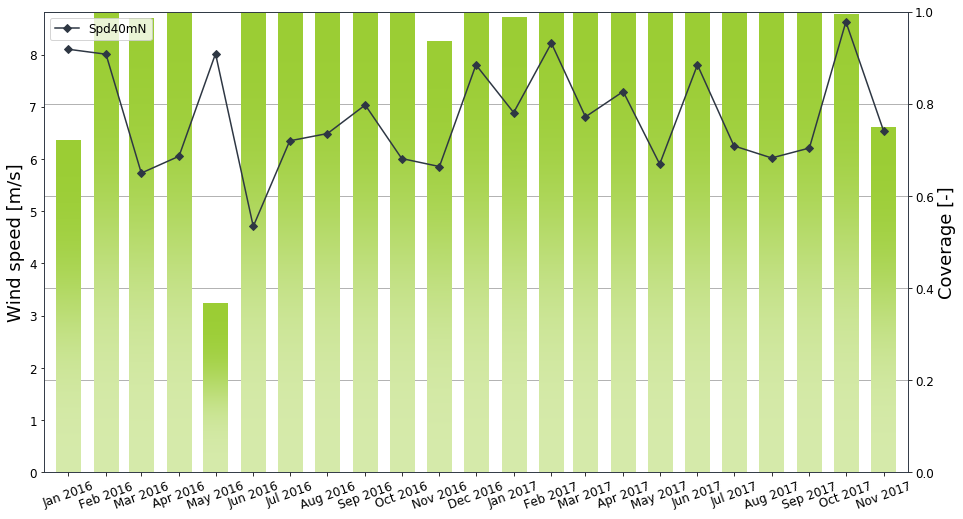

In [9]:
monthly_means_plot, monthly_means = bw.monthly_means(data.Spd40mN, return_coverage=True)
monthly_means_plot

***

<div style='margin-top: 3em; margin-bottom: 3em;'>
</div>

## Plotting sector ratios

The `sector_ratio()` function can be used to confirm reported boom orientations at a given height on the mast. 

C:\Users\andre\Anaconda3\lib\site-packages\matplotlib\font_manager.py:1328: UserWarning: findfont: Font family ['Gotham Rounded'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


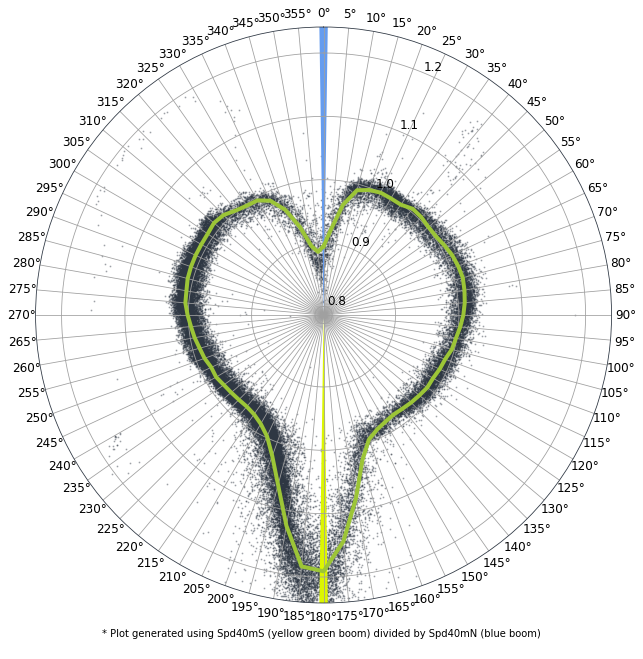

In [10]:
bw.sector_ratio(data.Spd40mN, data.Spd40mS, data.Dir78mS, boom_dir_1=0, boom_dir_2=180)

***

<div style='margin-top: 3em; margin-bottom: 3em;'>
</div>

## Plotting a '12x24' distribution

The `dist_12x24()` function can be used to visualise the level of diurnal and seasonal variation of a given parameter.

C:\Users\andre\Anaconda3\lib\site-packages\matplotlib\font_manager.py:1328: UserWarning: findfont: Font family ['Gotham Rounded'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


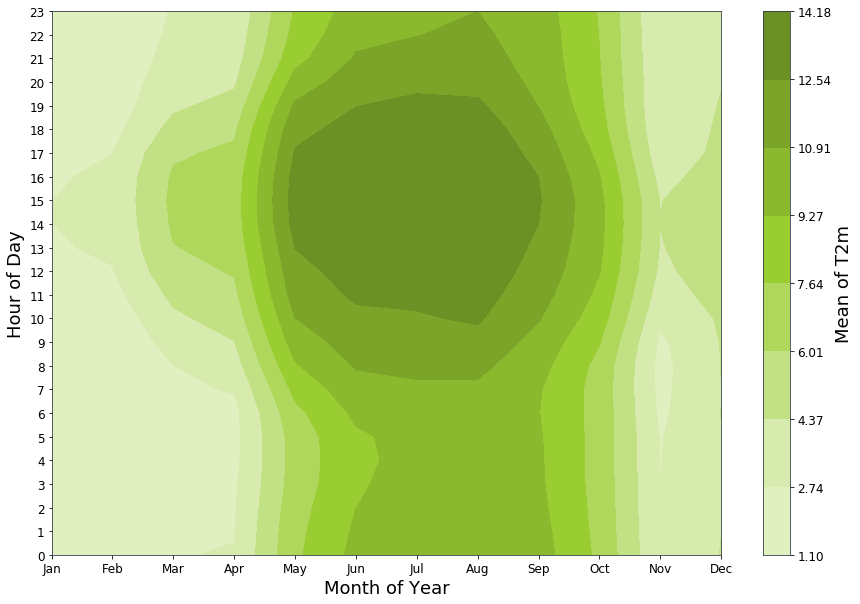

In [11]:
bw.dist_12x24(data.T2m)

***

<div style='margin-top: 3em; margin-bottom: 3em;'>
</div>

## Scaling a wind speed

The `scale_wind_speed()` function can be used to apply a given scale factor to a wind speed variable as follows.

In [12]:
# specify scale factor
scale_factor = 1.03 

# apply scale factor to Spd80mN variable
Spd80mN_scaled = bw.scale_wind_speed(data.Spd80mN, scale_factor) 

# show first 5 rows of result
Spd80mN_scaled.head(5)

Timestamp
2016-01-09 15:30:00        NaN
2016-01-09 15:40:00        NaN
2016-01-09 17:00:00        NaN
2016-01-09 17:10:00    7.60346
2016-01-09 17:20:00    8.21631
Name: Spd80mN, dtype: float64

***

<div style='margin-top: 3em; margin-bottom: 3em;'>
</div>

## Plotting a wind rose and exporting a .tab file

The `freq_table()` function compiles a directional frequency distribution from a concurent speed and direction time series. In the case below, we specify two outputs: a wind rose plot ('rose') and its associated numerical values ('freq_table').

In [13]:
rose, freq_table = bw.freq_table(Spd80mN_scaled,data.Dir78mS, return_data=True)

Once created, we can call the wind rose plot by typing its name.

C:\Users\andre\Anaconda3\lib\site-packages\matplotlib\font_manager.py:1328: UserWarning: findfont: Font family ['Gotham Rounded'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


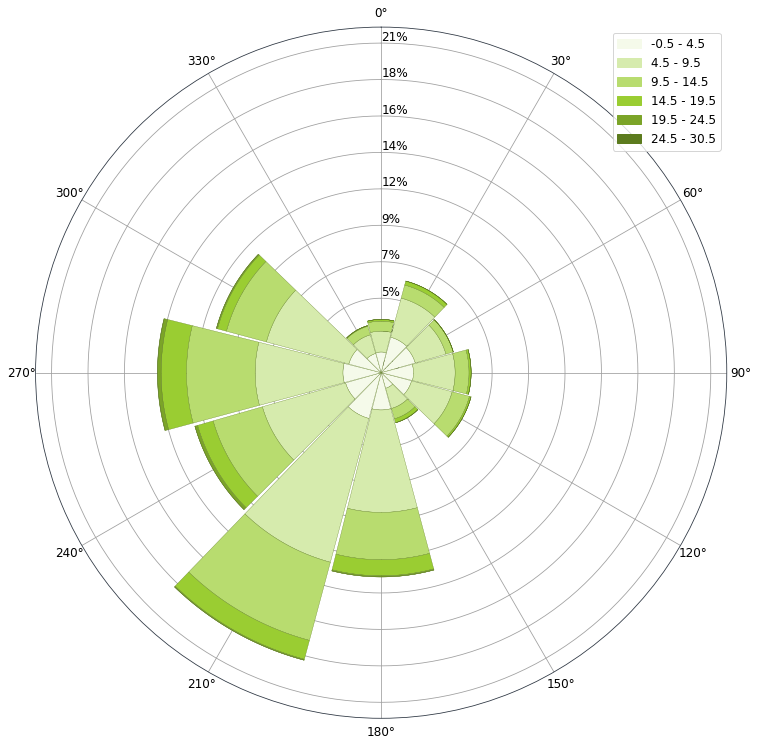

In [14]:
rose

And we can export the numerical data in the form of a '.tab' file into the current directory as follows. 

In [15]:
bw.export_tab_file(freq_table,80,50,50,'name_of_file')

Export of tab file successful.
